In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

### Portage River: TP

In [134]:
all_stations = [s[0] for s in Show_IDS]

In [142]:
WQP_name = "Phosphorus"

ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples.zip').open(name='result.csv'))


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(all_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(62, 63)

In [143]:
df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Portage_River_data.csv')

df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
sp= sp.append(df_heideleberg)
sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
sp['Station']=sp['MonitoringLocationIdentifier']
df_heideleberg.shape



(2695, 6)

In [144]:
all_stations

['21OHIO_WQX-S99Q01',
 '21OHIO_WQX-S02S23',
 '21OHIO_WQX-S02S14',
 '21OHIO_WQX-S02P06',
 '21OHIO_WQX-S02S16',
 'HTLP (NCWQR)',
 '21OHIO_WQX-S02S03',
 '21OHIO_WQX-S02S05']

In [145]:
pt = sns.color_palette("colorblind", len(all_stations))

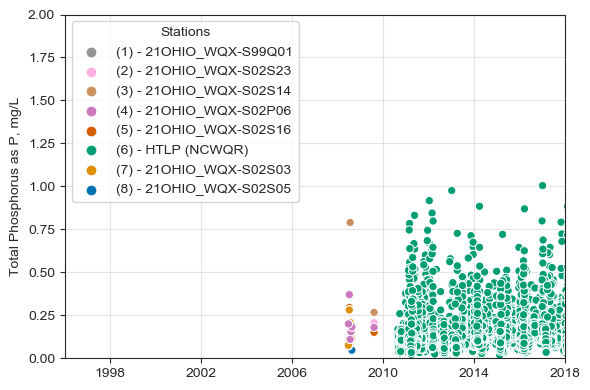

In [149]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=all_stations, hue='Station', palette=pt[::-1])
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(all_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations')

plt.ylim(0,2.)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Western/US/Portage R/Portage TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/Portage_R/Portage_TP.pdf')

In [151]:
# sp.groupby('Station')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_TP_stat.html')
print(sp.groupby('Station')["ResultMeasureValue"].describe().reindex(all_stations).round(2).to_latex())



\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
Station           &         &       &       &       &       &       &       &       \\
\midrule
21OHIO\_WQX-S99Q01 &    11.0 &  0.16 &  0.05 &  0.07 &  0.15 &  0.18 &  0.19 &  0.21 \\
21OHIO\_WQX-S02S23 &     8.0 &  0.14 &  0.03 &  0.10 &  0.12 &  0.14 &  0.15 &  0.21 \\
21OHIO\_WQX-S02S14 &    11.0 &  0.31 &  0.25 &  0.11 &  0.18 &  0.19 &  0.28 &  0.79 \\
21OHIO\_WQX-S02P06 &    11.0 &  0.20 &  0.09 &  0.11 &  0.16 &  0.18 &  0.20 &  0.37 \\
21OHIO\_WQX-S02S16 &    11.0 &  0.19 &  0.07 &  0.09 &  0.16 &  0.19 &  0.20 &  0.30 \\
HTLP (NCWQR)      &  2695.0 &  0.16 &  0.17 &  0.01 &  0.08 &  0.12 &  0.20 &  4.84 \\
21OHIO\_WQX-S02S03 &     6.0 &  0.15 &  0.08 &  0.08 &  0.12 &  0.12 &  0.19 &  0.28 \\
21OHIO\_WQX-S02S05 &     4.0 &  0.08 &  0.03 &  0.05 &  0.07 &  0.08 &  0.09 &  0.11 \\
\bottomrule
\end{tabular}



### Portage River: Discharge

In [20]:
# portage_Q = hf.NWIS('04195820', 'dv', period='P55D')

site = '04195820'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
portage_Q = hf.extract_nwis_df(response.json())

In [21]:
portage_Q['Flow, CFS'] = portage_Q['USGS:04195820:00060:00003']
portage_Q= portage_Q.reset_index()
portage_Q['Date']  = portage_Q['datetime']
portage_Q['Date'] =pd.to_datetime(portage_Q['Date'], errors='coerce')
portage_Q = portage_Q[['Date', 'Flow, CFS']]
portage_Q['Source'] = 'NWIS'

In [22]:
portage_Q.describe()

,"Flow, CFS"
count,7398.000000
mean,545.027856
std,1200.039170
min,3.090000
25%,39.525000
50%,129.000000
75%,437.000000
max,13100.000000


In [23]:
df_Q_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Flow_Portage_River_data.csv')
df_Q_heideleberg['Date'] =pd.to_datetime(df_Q_heideleberg['Date'], errors='coerce')
df_Q_heideleberg['Source'] = 'HTLP (NCWQR)'


In [24]:
df_Q_heideleberg.shape

(2673, 3)

In [25]:
portage_Q = portage_Q.append(df_Q_heideleberg)

In [26]:
portage_Q[portage_Q.Source=='NWIS'][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/Portage R/Flow_Portage_R_CFS.csv', index=False)

In [27]:
portage_Q['Discharge, cms'] = 0.028*portage_Q['Flow, CFS']

In [176]:
portage_Q.Source.unique()

array(['NWIS', 'HTLP (NCWQR)'], dtype=object)

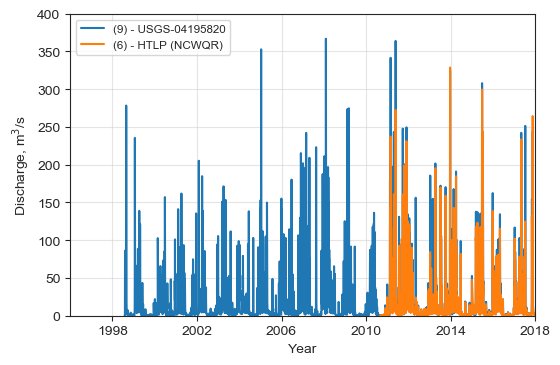

In [178]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.lineplot(x='Date', y='Discharge, cms', data=portage_Q, hue='Source')
plt.legend(['(9) - USGS-04195820', '(6) - HTLP (NCWQR)'], loc=2, fontsize='small')
plt.ylim(0,400)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Discharge, m$^3$/s")
plt.xlabel("Year")
# plt.tight_layout()
plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/Portage_R/Portage_Q.pdf')

In [29]:
portage_Q.groupby('Source')["Flow, CFS"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_Q_stat.html')

### Map

In [30]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
stations.loc[stations['MonitoringLocationIdentifier'] == "21OHIO_WQX-S02S17", 'MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'


In [196]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon

location = (41.505093, -83.094421)
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=11.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

Show_IDS = [['21OHIO_WQX-S99Q01', False],
            ['21OHIO_WQX-S02S23', False],
            ['21OHIO_WQX-S02S14', False],
            ['21OHIO_WQX-S02P06', False],
            ['21OHIO_WQX-S02S16', False],
            ['HTLP (NCWQR)', True],
            ["21OHIO_WQX-S02S03", False],
            ["21OHIO_WQX-S02S05", False],
            ["USGS-04195820", True]]
#             


for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=20, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index==6:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.003],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt">{}</div>'.format(index+1),
            )
        ).add_to(m)
    
# minimap = MiniMap(width=150, height=100, zoom_level_offset=-5, tile_layer = "stamentoner")
# m.add_child(minimap)
m



21OHIO_WQX-S99Q01
21OHIO_WQX-S02S23
21OHIO_WQX-S02S14
21OHIO_WQX-S02P06
21OHIO_WQX-S02S16
HTLP (NCWQR)
21OHIO_WQX-S02S03
21OHIO_WQX-S02S05
USGS-04195820


In [132]:
st

'21OHIO_WQX-S02S17'

In [39]:
St_IDS = ['21OHIO_WQX-S99Q01', '21OHIO_WQX-S02S23', '21OHIO_WQX-S02S12', '21OHIO_WQX-S02S14', 'USGS-93912302262020', '21OHIO_WQX-S02P06', 
      '21OHIO_WQX-S99Q02', '21OHIO_WQX-S02S16', '21OHIO_WQX-S02S17']

In [15]:
r_stations.shape

(71, 36)

### Error plots

In [2]:
EGRET_Daily = pd.read_csv('One_by_one/Western/US/Portage R/EGRET Result/TP/Portage_River_TP_Daily.csv')
EGRET_Sample = pd.read_csv('One_by_one/Western/US/Portage R/EGRET Result/TP/Portage_River_TP_Sample.csv')




In [3]:
# EGRET_Sample = EGRET_Sample[EGRET_Sample['SE']/EGRET_Sample['ConcAve']<1]

In [4]:
EGRET_Sample['logC'] = np.log10(EGRET_Sample['ConcAve'])

In [5]:
EGRET_Sample['logCHat'] = np.log10(EGRET_Sample['ConcHat'])

In [6]:
EGRET_Sample['percent_error'] = EGRET_Sample['SE'] - EGRET_Sample['ConcAve']

In [7]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000

In [8]:
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


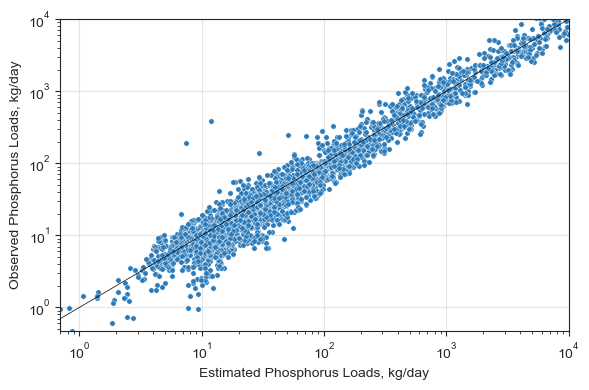

In [9]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000],[-100,100000], 'k', lw=0.5)
plt.xlim(0,10_000)
plt.ylim(0,10_000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/Portage_R/Portage_FvsF.pdf')


In [10]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000

In [11]:
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()

In [12]:
EGRET_Daily.head()

,Unnamed: 0,Date,Q,Julian,Month,Day,DecYear,MonthSeq,waterYear,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA
0,1,1998-08-01,0.651287,54268,8,214,1998.582306,1784,1998,1,-0.428804,NaN,NaN,-3.638705,0.491444,0.029671,1.669628,0.039654,18.278325,0.609414
1,2,1998-08-02,0.509703,54269,8,215,1998.585046,1784,1998,2,-0.673927,NaN,NaN,-3.560684,0.487239,0.032276,1.421389,0.043489,23.534455,0.518807
2,3,1998-08-03,0.481386,54270,8,216,1998.587785,1784,1998,3,-0.731085,NaN,NaN,-3.534336,0.485679,0.033170,1.379605,0.047224,23.266349,0.503556
3,4,1998-08-04,0.453070,54271,8,217,1998.590525,1784,1998,4,-0.791710,NaN,NaN,-3.507174,0.483965,0.034086,1.334315,0.063392,105.327643,0.487025
4,5,1998-08-05,1.330892,54272,8,218,1998.593265,1784,1998,5,0.285849,NaN,NaN,-3.684241,0.497095,0.028435,3.269753,0.059829,139.939504,1.193460


In [13]:
EGRET_Daily_an['Fx_SE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']

In [14]:
print(EGRET_Daily_an[['waterYear', 'FluxYearMTA','Fx_SE']].round(1).to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 waterYear &  FluxYearMTA &  Fx\_SE \\
\midrule
      1998 &        226.1 &  102.0 \\
      1999 &         81.9 &   37.0 \\
      2000 &         59.0 &   26.6 \\
      2001 &         72.0 &   32.5 \\
      2002 &        115.9 &   52.3 \\
      2003 &        117.6 &   53.0 \\
      2004 &         82.0 &   37.0 \\
      2005 &        176.4 &   79.6 \\
      2006 &        127.3 &   57.4 \\
      2007 &        207.0 &   93.4 \\
      2008 &        270.8 &  122.2 \\
      2009 &        154.0 &   69.5 \\
      2010 &         80.6 &   36.4 \\
      2011 &        347.7 &  156.8 \\
      2012 &        220.7 &   99.6 \\
      2013 &        142.3 &   64.2 \\
      2014 &        200.8 &   90.6 \\
      2015 &        168.3 &   75.9 \\
      2016 &        118.2 &   53.3 \\
      2017 &        154.9 &   69.9 \\
      2018 &        211.5 &   95.4 \\
      2019 &         25.8 &   11.7 \\
\bottomrule
\end{tabular}



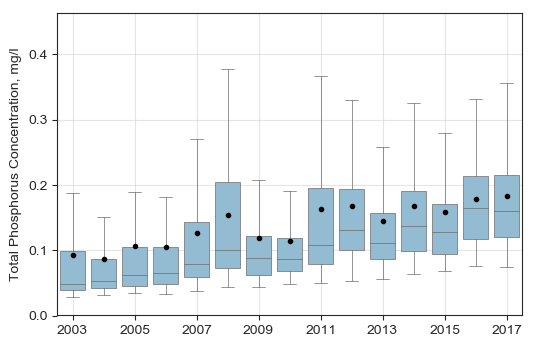

In [15]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(4.5, 19.5)
plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,600)

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/Portage_R/Portage_PC.pdf')


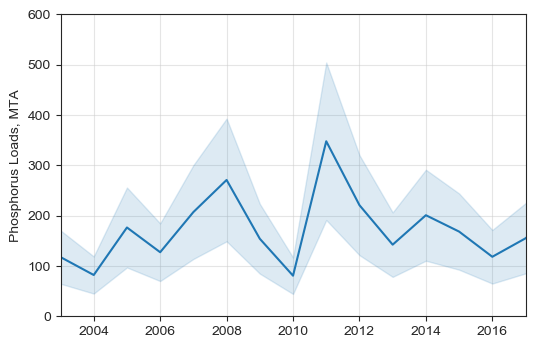

In [16]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
                 EGRET_Daily_an['FluxYearMTA'][5:-1]-0.45*EGRET_Daily_an['FluxYearMTA'][5:-1],
                 EGRET_Daily_an['FluxYearMTA'][5:-1]+0.45*EGRET_Daily_an['FluxYearMTA'][5:-1], 
                 color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,600)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/Portage_R/Portage_PFlux.pdf')


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(77, 63)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,23,24,25,30,33,35,37,39,40,41,42,43,44,48,49,50,54,55,56,57,58,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Portage River: TN

In [303]:
WQP_name = "Kjeldahl nitrogen"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp = sp[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(69, 4)

In [304]:
WQP_name = "Inorganic nitrogen (nitrate and nitrite)"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
sp_1 = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp_1['ResultMeasureValue'] = pd.to_numeric(sp_1['ResultMeasureValue'])
sp_1 = sp_1[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp_1.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(68, 4)

In [305]:
sp_total = pd.merge(sp, sp_1, on=['ActivityStartDate', 'MonitoringLocationIdentifier'], how='inner')
sp_total['ResultMeasureValue'] = sp_total['ResultMeasureValue_x'] + sp_total['ResultMeasureValue_y']
sp_total = sp_total.groupby(['MonitoringLocationIdentifier','ActivityStartDate']).mean().reset_index()[['MonitoringLocationIdentifier','ActivityStartDate','ResultMeasureValue']].dropna()
# sp_total


In [336]:
df_heideleberg = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ncwqr.org/Portage_River_data.xlsx')

df_heideleberg['ActivityStartDate'] =pd.to_datetime(df_heideleberg['Datetime (date and time of sample collection)'], errors='coerce').dt.date
df_heideleberg['ResultMeasureValue'] = df_heideleberg['TKN, mg/L (Total Kjeldahl nitrogen)'] + df_heideleberg['NO23, mg/L as N']
df_heideleberg['MonitoringLocationIdentifier'] = 'Heidelberg'

df_heideleberg = df_heideleberg[['ActivityStartDate','MonitoringLocationIdentifier','ResultMeasureValue']]


# df_heideleberg = df_heideleberg.groupby('ActivityStartDate').mean()
# df_heideleberg['code'] = 0
# df_heideleberg[['code','ResultMeasureValue']].to_csv('One_by_one/Western/US/Portage R/TN_Portage_River_data.csv')



In [337]:
df_N = df_heideleberg.append(sp_total)

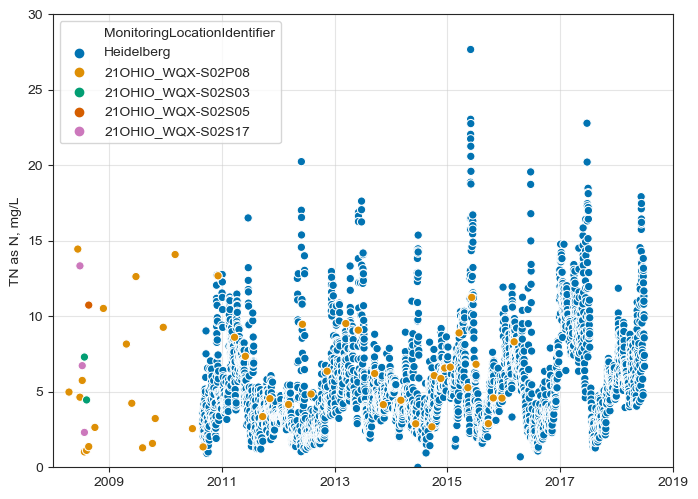

In [347]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=df_N,hue='MonitoringLocationIdentifier', palette="colorblind")
plt.legend()
plt.ylim(0,30)
plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("TN as N, mg/L")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage TN.pdf')

In [350]:
csv_f = df_N[df_N.MonitoringLocationIdentifier == 'Heidelberg'].groupby('ActivityStartDate').mean()
csv_f = csv_f[csv_f['ResultMeasureValue']<30]
csv_f = csv_f[csv_f['ResultMeasureValue']>0]
csv_f['code'] = 0
csv_f[['code', 'ResultMeasureValue']].to_csv('One_by_one/Western/US/Portage R/TN_Portage_River_data.csv')

In [288]:
df_N.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_TN_stat.html')


### Portage: Chloride

In [289]:
WQP_name = "Chloride"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp = sp[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(68, 4)

In [290]:
df_heideleberg = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ncwqr.org/Portage_River_data.xlsx')

df_heideleberg['ActivityStartDate'] =pd.to_datetime(df_heideleberg['Datetime (date and time of sample collection)'], errors='coerce')
df_heideleberg['ResultMeasureValue'] = df_heideleberg['Chloride, mg/L']
df_heideleberg['MonitoringLocationIdentifier'] = 'Heidelberg'
df_heideleberg = df_heideleberg[['MonitoringLocationIdentifier','ActivityStartDate','ResultMeasureValue']]


In [291]:
df_Cl = df_heideleberg.append(sp)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


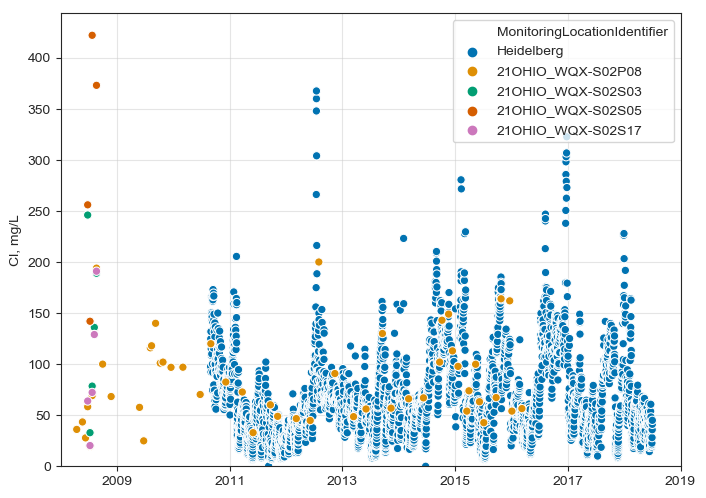

In [294]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=df_Cl,hue='MonitoringLocationIdentifier', palette="colorblind")
plt.legend()
plt.ylim(0,)
plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Cl, mg/L")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage Cl.pdf')

In [295]:
df_Cl.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_Cl_stat.html')


### Portage: Silica

In [296]:
WQP_name = "Silica"

csv_file_df = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/Western/Portage R/result.csv')
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp = sp[['ResultMeasureValue', 'ActivityStartDate', 'MonitoringLocationIdentifier', 'ResultMeasure/MeasureUnitCode']]
sp.shape



(0, 4)

In [297]:
df_heideleberg = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ncwqr.org/Portage_River_data.xlsx')

df_heideleberg['ActivityStartDate'] =pd.to_datetime(df_heideleberg['Datetime (date and time of sample collection)'], errors='coerce')
df_heideleberg['ResultMeasureValue'] = df_heideleberg['Silica, mg/L']
df_heideleberg['MonitoringLocationIdentifier'] = 'Heidelberg'
df_heideleberg = df_heideleberg[['MonitoringLocationIdentifier','ActivityStartDate','ResultMeasureValue']]


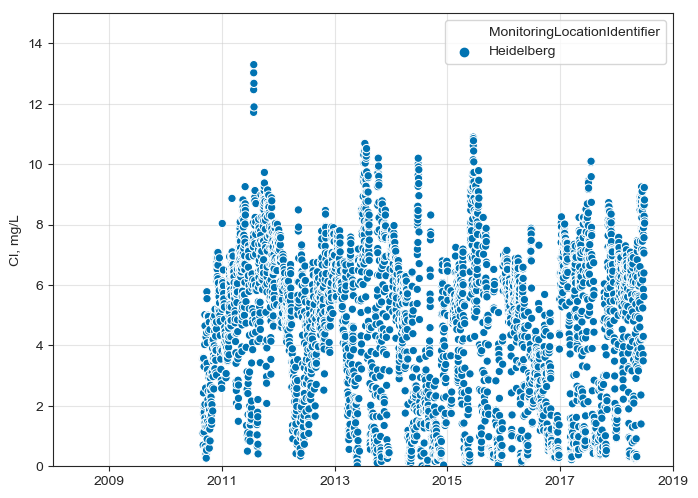

In [298]:
fig,ax=plt.subplots(1,1,figsize=(8,6), dpi=100)
sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=df_heideleberg,hue='MonitoringLocationIdentifier', palette="colorblind")
plt.legend()
plt.ylim(0,15)
plt.xlim(datetime.datetime(2008,1,1), datetime.datetime(2019,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Cl, mg/L")
plt.xlabel("")
plt.savefig('One_by_one/Western/US/Portage R/Portage Si.pdf')

In [299]:
df_heideleberg.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().to_html('One_by_one/Western/US/Portage R/Portage R_Si_stat.html')
